<a href="https://colab.research.google.com/github/ehpub/ML-with-Python/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_with_python_005_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80_%EB%AA%A8%EB%8D%B8%EA%B3%BC_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[설명](https://ehpub.co.kr/%ec%84%a0%ed%98%95-%ed%9a%8c%ea%b7%80-%eb%aa%a8%eb%8d%b8%ea%b3%bc-%ea%b2%bd%ec%82%ac%ed%95%98%ea%b0%95%eb%b2%95-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d-with-%ed%8c%8c%ec%9d%b4%ec%8d%ac/)

사용할 모듈 포함문

In [ ]:
from sklearn.linear_model import LinearRegression #선형 회귀
from sklearn.metrics import mean_squared_error #평균 제곱 오차
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 선형 회귀 모델

독립 변수와 종속 변수 사이의 선형 관계를 찾아 회귀식(선형 회귀 함수)을 통해 예측하는 모델

모델 학습 과정에서 찾은 선형 관계로 예측에 사용하는 회귀식을 선형 회귀 함수라고 부른다.



### 선형 회귀 함수

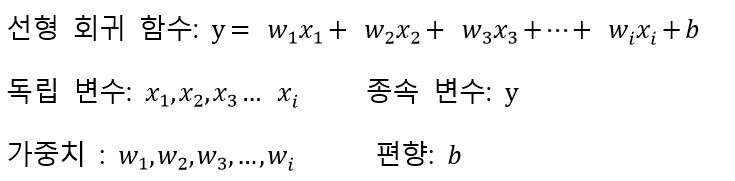

머신러닝 모델이 학습 과정에서 알아낸 값으로 예측에 사용하는 값들을 모델 파리미터라고 부릅니다.

선형 회귀 모델에서 모델 파라마터는 가중치와 편향이 있습니다.

일반적으로 머신러닝의 복잡도는 모델 파라미터의 개수와 비례합니다.

- 사용할 데이터

In [ ]:
x_src = np.arange(-10,10,0.5)
y_src = np.array([-15., -13., -15., -10., -11., -18., -10.,  -7., -13., -12.,  -3.,
        -8.,  -7.,  -2.,   1.,  -2.,   1.,   1.,   9.,   3.,  11.,   2.,
         5.,   2.,  14.,  13.,  12.,  12.,  15.,   8.,  17.,  12.,  14.,
        14.,  14.,  14.,  18.,  17.,  19.,  25] )

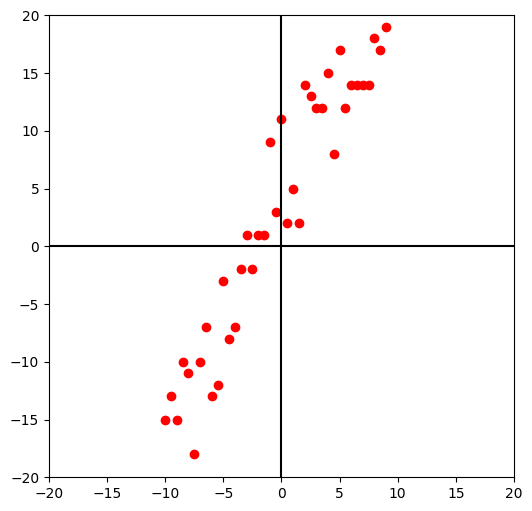

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(x_src,y_src,'ro')
plt.axvline(x=0,color='k')
plt.axhline(y=0,color='k')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.show()

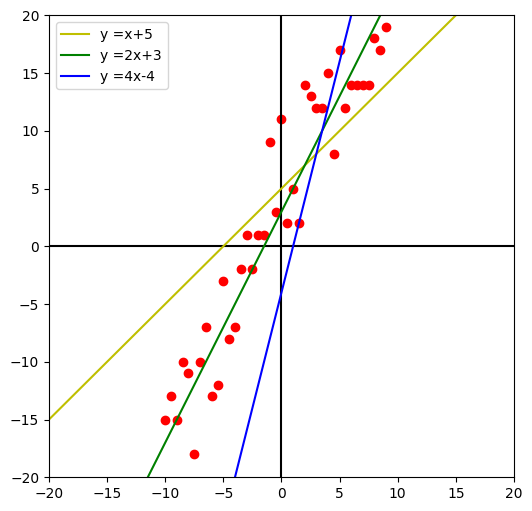

In [ ]:
xbs = np.array([-20,20])
ys1 = np.array([-20*1+5, 20*1+5])
ys2 = np.array([-20*2+3, 20*2+3])
ys3 = np.array([-20*4-4, 20*4-4])
plt.figure(figsize=(6,6))
plt.plot(x_src,y_src,'ro')
plt.axvline(x=0,color='k')
plt.axhline(y=0,color='k')
plt.plot(xbs,ys1,'y',label=f'y =x+5')
plt.plot(xbs,ys2,'g',label=f'y =2x+3')
plt.plot(xbs,ys3,'b',label=f'y =4x-4')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.legend()
plt.show()

## LinearRegression


class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

[메뉴얼 사이트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
x = x_src.reshape(-1,1)
y = y_src
print(f'독립 변수 구조:{x.shape}, 종속 변수 구조:{y.shape}')

독립 변수 구조:(40, 1), 종속 변수 구조:(40,)


In [ ]:
model = LinearRegression() #모델 생성

### 모델 학습 전 가중치, 편향 확인

In [ ]:
print(f'가중치:{model.coef_} 편향:{model.intercept_}')

AttributeError: ignored

### 모델 학습 및 가중치, 편향 확인

In [ ]:
model.fit(x,y)
print(f'가중치:{np.round(model.coef_,2)} 편향:{model.intercept_:.2f}')

가중치:[1.91] 편향:3.65


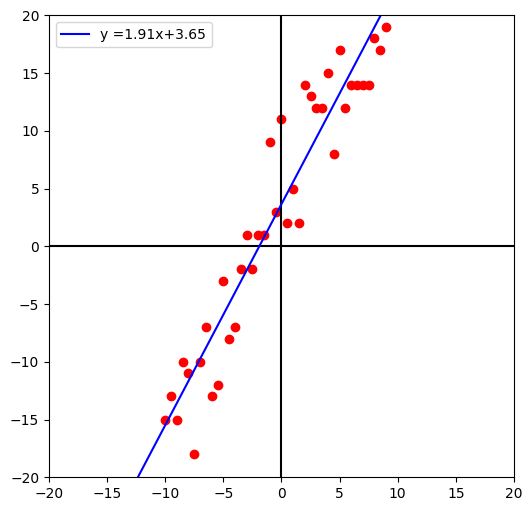

In [ ]:
xbs = np.array([-20,20])
ymin = -20*model.coef_[0] +model.intercept_
ymax = 20*model.coef_[0] +model.intercept_
ybs = np.array([ymin,ymax ])
plt.figure(figsize=(6,6))
plt.plot(x_src,y_src,'ro')
plt.axvline(x=0,color='k')
plt.axhline(y=0,color='k')
plt.plot(xbs,ybs,'b',label=f'y ={model.coef_[0]:.2f}x{model.intercept_:+.2f}')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.legend()
plt.show()

In [ ]:
x_test = xbs.reshape(-1,1) #(모델,독립변수) 구조로 변경
pred = model.predict(x_test)
print(f'pred:{np.round(pred,2)}')
print(f'ybs :{np.round(ybs,2)}')

pred:[-34.64  41.95]
ybs :[-34.64  41.95]


## 경사하강법을 이용하여 선형 회귀 모델 만들어 보기

In [ ]:
pred = model.predict(x)
print(f'mse:{mean_squared_error(y,pred):.3f}')

mse:11.827


In [ ]:
def mse(actual,pred):
  return np.sum((actual-pred)**2)/len(actual)

In [ ]:
print(f'mse:{mse(y,pred):.3f}')

mse:11.827


In [ ]:
params = [[1,5],[2,3],[4,-4]]
for w,b in params:
  pr = np.array([w*e + b for e in x.reshape(-1)])
  print(f'w:{w:2d} b:{b:2d} mse:{mse(y,pr):.3f}')

w: 1 b: 5 mse:42.175
w: 2 b: 3 mse:12.525
w: 4 b:-4 mse:223.525


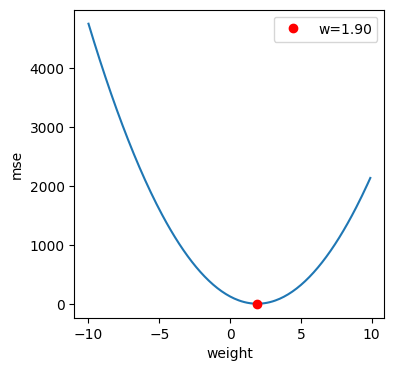

In [ ]:
b = model.intercept_
ws = np.arange(-10,10,0.1)
preds = np.array([[w *e + b for e in x.reshape(-1)] for w in ws])
mses =np.array([ mse(y,p) for p in preds])
mi = np.argmin(mses)
plt.figure(figsize=(4,4))
plt.plot(ws,mses)
plt.plot(ws[mi],mses[mi],'ro',label=f'w={ws[mi]:.2f}')
plt.xlabel('weight')
plt.ylabel('mse')
plt.legend()
plt.show()

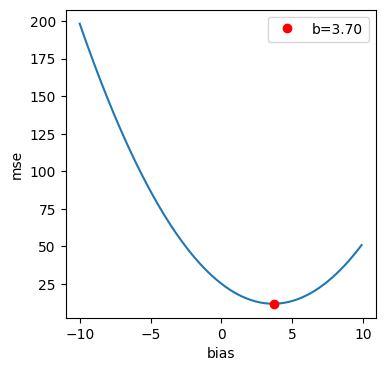

In [ ]:
w = model.coef_[0]
bs = np.arange(-10,10,0.1)
preds = np.array([[w *e + b for e in x.reshape(-1)] for b in bs])
mses =np.array([ mse(y,p) for p in preds])
mi = np.argmin(mses)
plt.figure(figsize=(4,4))
plt.plot(bs,mses)
plt.plot(bs[mi],mses[mi],'ro',label=f'b={bs[mi]:.2f}')
plt.xlabel('bias')
plt.ylabel('mse')
plt.legend()
plt.show()

## 경사하강법

2차 곡선에 기울기가 양수이면 왼쪽, 음수이면 오른쪽으로 이동하면 바닥을 만날 수 있다.



- mse 수식

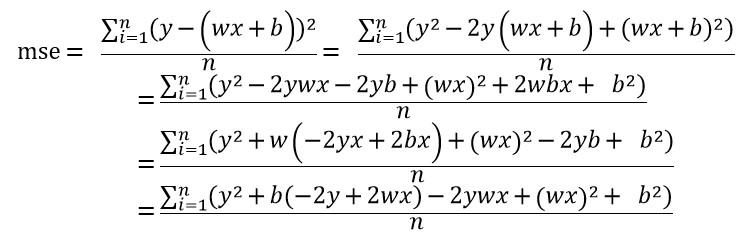

- dmse/dw 수식

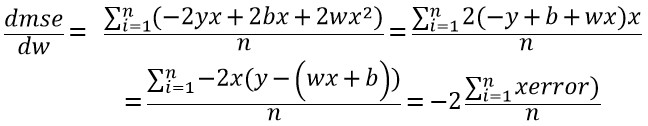

- dmse/db 수식

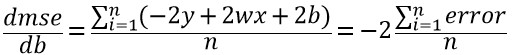

In [ ]:
def gradient(x,y,w,b):
  pred = w*x + b
  error = y - pred
  n = len(y)
  wg = -2*sum(x*error)/n
  bg = -2*sum(error)/n
  return wg,bg,mse(y,pred)

In [ ]:
xr = x.reshape(-1)
b = np.random.uniform(-1,1)
w = np.random.uniform(-1,1)
lr = 0.01
print(f'학습률:{lr}')

print(f'시작 w:{w:.3f} b:{b:.3f} ')
wg, bg, mse_val = gradient(xr,y,w,b)
print(f'w기울기:{wg:.3f} b기울기:{bg:.3f} {mse_val:.3f}')

학습률:0.01
시작 w:-0.194 b:-0.205 
w기울기:-138.834 b기울기:-6.663 171.070


In [ ]:
w = w - lr*wg
b = b - lr*bg
print(f'w:{w:.3f} b:{b:.3f} ')
wg, bg, mse_val = gradient(xr,y,w,b)
print(f'w기울기:{wg:.3f} b기울기:{bg:.3f} {mse_val:.3f}')

w:1.194 b:-0.138 
w기울기:-46.196 b기울기:-7.224 42.165


In [ ]:
w = w - lr*wg
b = b - lr*bg
print(f'w:{w:.3f} b:{b:.3f} ')
wg, bg, mse_val = gradient(xr,y,w,b)
print(f'w기울기:{wg:.3f} b기울기:{bg:.3f} {mse_val:.3f}')

w:1.656 b:-0.066 
w기울기:-15.396 b기울기:-7.310 27.413


In [ ]:
w = w - lr*wg
b = b - lr*bg
print(f'w:{w:.3f} b:{b:.3f} ')
wg, bg, mse_val = gradient(xr,y,w,b)
print(f'w기울기:{wg:.3f} b기울기:{bg:.3f} {mse_val:.3f}')

w:1.810 b:0.007 
w기울기:-5.156 b기울기:-7.241 25.299


In [ ]:
def gradient_desent(x,y,lr=0.001,steps=10000):
  w = np.random.uniform(-1,1)
  b = np.random.uniform(-1,1)
  hist=[]
  for i in range(steps):
    wg,bg,mse_val = gradient(x,y,w,b)
    if (i<5)|(i%100==0):
      hist.append([i,w,b,mse_val])
    w = w - wg*lr
    b = b - bg*lr
  return w,b,hist

In [ ]:
w,b,hist = gradient_desent(xr,y)
print(f'w:{w:.3f} b:{b:.3f}')
pred = w*xr + b
print(mse(y,pred))

w:1.915 b:3.654
11.826615853658534


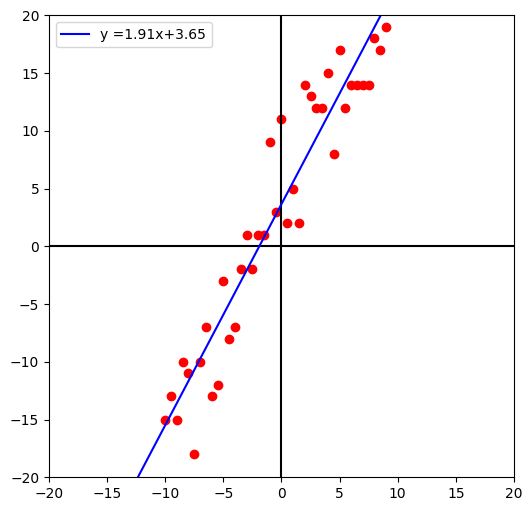

In [ ]:
xbs = np.array([-20,20])
ymin = -20*w + b
ymax = 20*w + b
ybs = np.array([ymin,ymax ])
plt.figure(figsize=(6,6))
plt.plot(x_src,y_src,'ro')
plt.axvline(x=0,color='k')
plt.axhline(y=0,color='k')
plt.plot(xbs,ybs,'b',label=f'y ={w:.2f}x{b:+.2f}')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.legend()
plt.show()

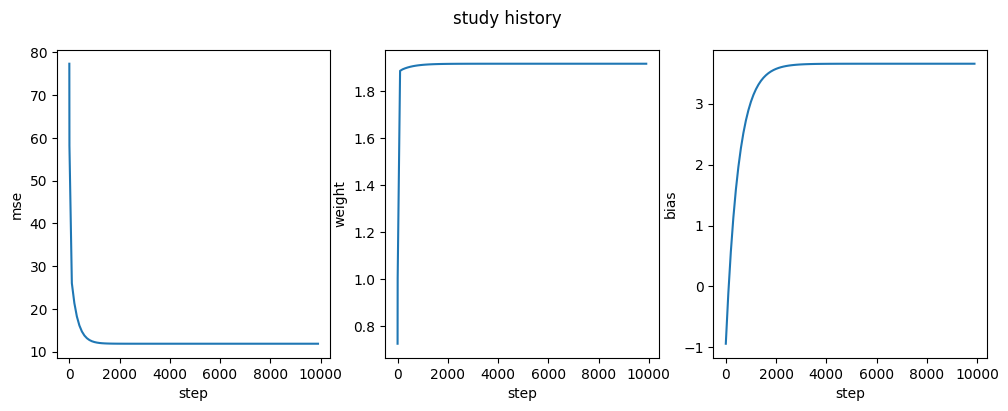

In [ ]:
steps = [i for i,_,_,_ in hist]
mses = [mv for _,_,_,mv in hist]
weights = [weight for _,weight,_,_ in hist]
biases = [bias for _,_,bias,_ in hist]
fig, axs = plt.subplots(ncols=3,figsize=(12,4))
axs[0].plot(steps,mses)
axs[0].set_xlabel('step')
axs[0].set_ylabel('mse')
axs[1].plot(steps,weights)
axs[1].set_xlabel('step')
axs[1].set_ylabel('weight')
axs[2].plot(steps,biases)
axs[2].set_xlabel('step')
axs[2].set_ylabel('bias')
plt.suptitle("study history")
plt.show()